**PROJECT-01**
**Idea: Exploratory Data Analysis (EDA) on Retail Sales Data**

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())



# Ensure correct data types
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicates
df.drop_duplicates(inplace=True)

print(df.info())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
D

In [ ]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
df['Sales'] = np.random.randint(low=0, high=1000, size=len(df))

In [ ]:
# Calculate basic statistics
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]
std_sales = df['Sales'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_sales}")


Mean Sales: 511.056
Median Sales: 518.0
Mode Sales: 802
Standard Deviation of Sales: 292.2082793873961


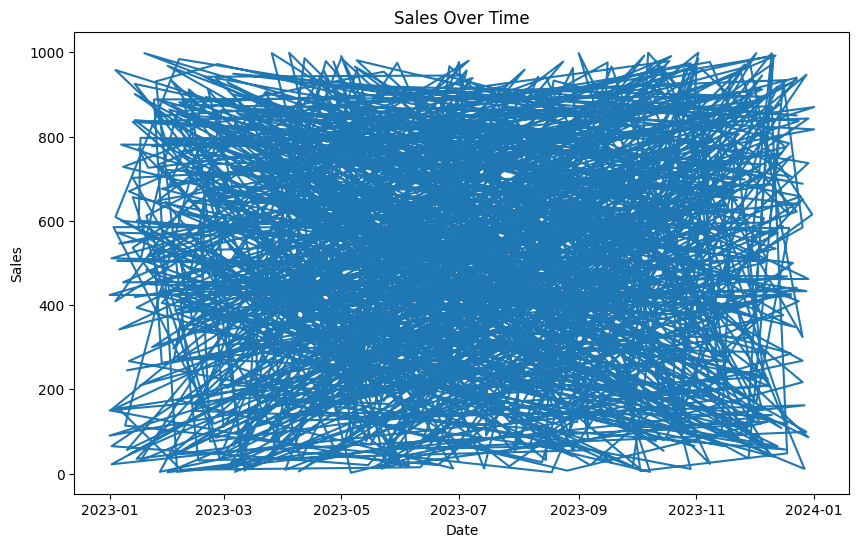

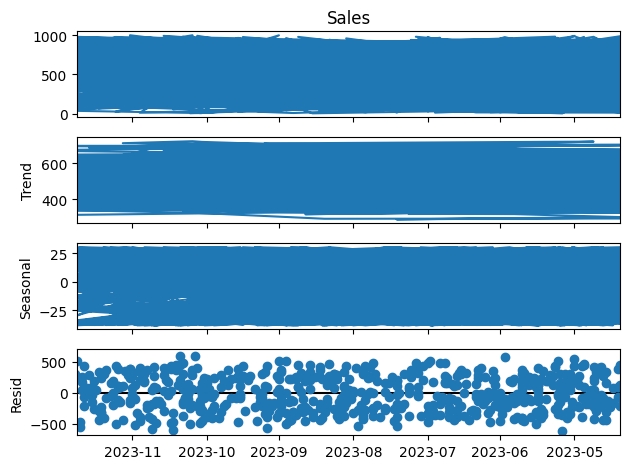

In [ ]:
import matplotlib.pyplot as plt

# Set the date column as the index
df.set_index('Date', inplace=True)

# Plot sales over time
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Decompose the time series to see trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive', period=12)
result.plot()
plt.show()


In [ ]:
df['CustomerID', 'Location'] = np.random.randint(low=0, high=1000, size=len(df))

In [ ]:
df['ProductID'] = np.random.randint(low=0, high=1000, size=len(df))

In [ ]:
# Customer demographics analysis (example: if columns are 'Age', 'Gender', 'Location')
customer_df = df[['CustomerID', 'Age', 'Gender',]].drop_duplicates()

# Calculate average purchase value per customer
avg_purchase_value = df.groupby('CustomerID')['Sales'].mean()

# Top-selling products
top_selling_products = df.groupby('ProductID')['Sales'].sum().sort_values(ascending=False).head(10)

print("Top-Selling Products:")
print(top_selling_products)


Top-Selling Products:
ProductID
359    3359
221    3179
438    3137
549    2960
84     2889
235    2697
892    2675
761    2632
357    2571
126    2518
Name: Sales, dtype: int64


In [ ]:
df.dtypes

Transaction ID             int64
Customer ID               object
Gender                    object
Age                        int64
Product Category          object
Quantity                   int64
Price per Unit             int64
Total Amount               int64
Sales                      int64
CustomerID                 int64
(CustomerID, Location)     int64
products                   int64
ProductID                  int64
dtype: object

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(float)

In [ ]:
df = df.select_dtypes(include=[np.number])

<Axes: >

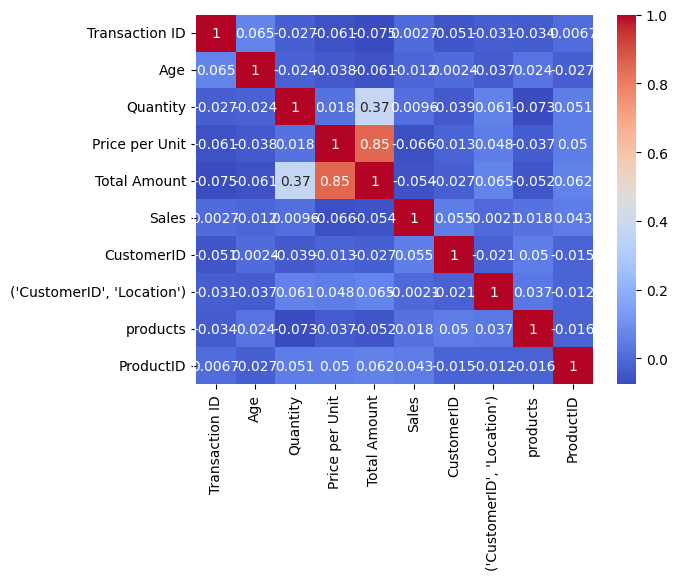

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

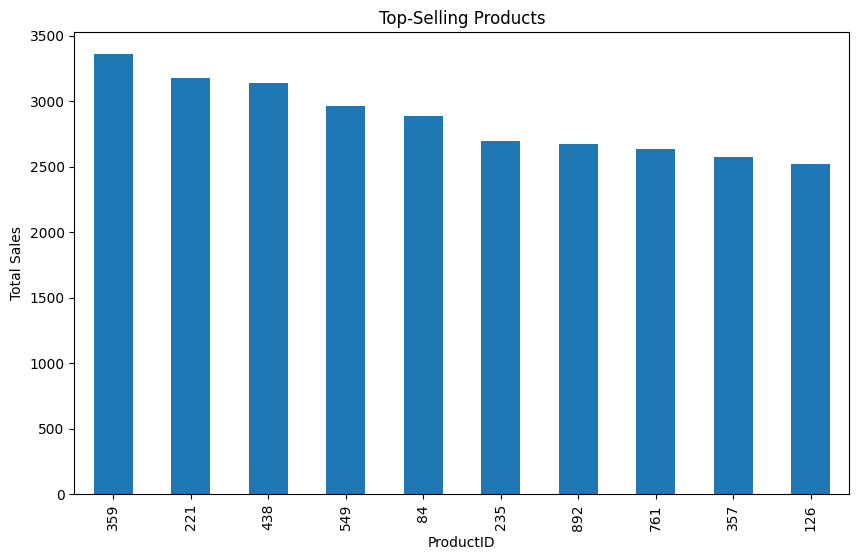

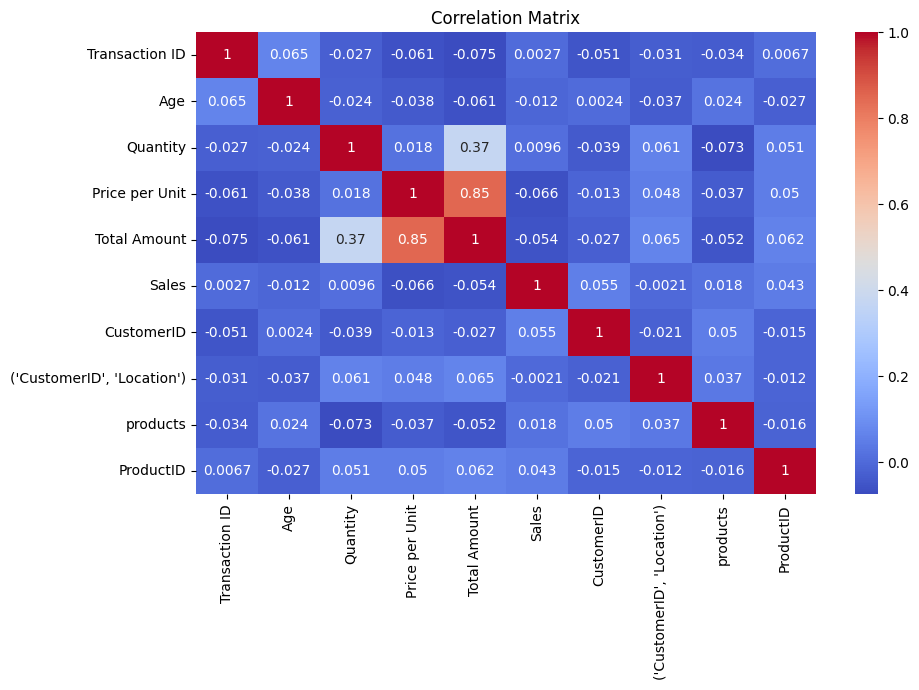

In [ ]:
import seaborn as sns

# Bar chart for top-selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar')
plt.title('Top-Selling Products')
plt.xlabel('ProductID')
plt.ylabel('Total Sales')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Sales Trend Analysis


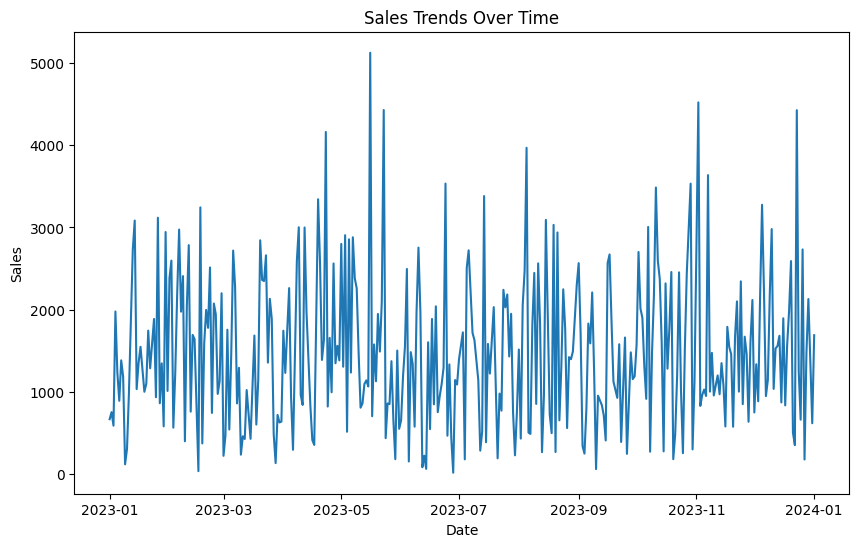

In [ ]:
import matplotlib.pyplot as plt

# Aggregate sales by date
daily_sales = df.groupby('Date').agg({'Sales': 'sum'}).reset_index()

# Plot sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


product performance

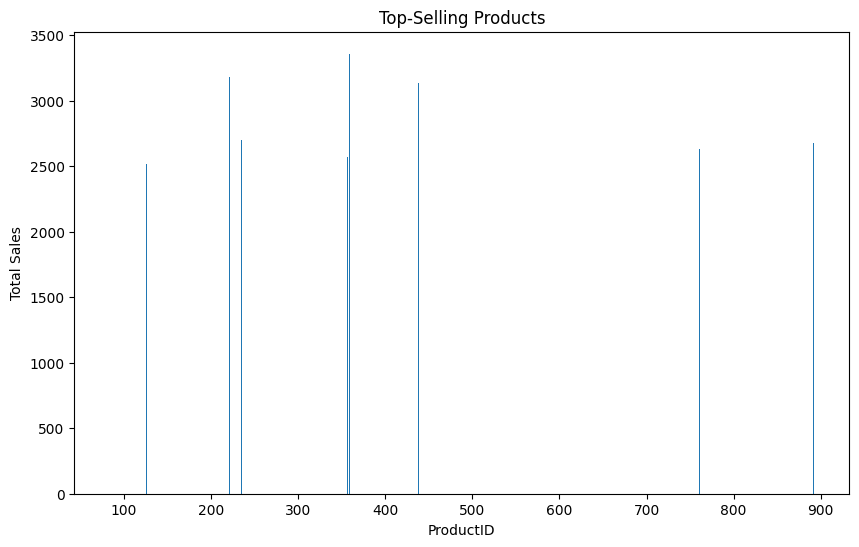

In [ ]:
# Identify top-selling products
top_products = df.groupby('ProductID').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head(10).reset_index()

# Plot top-selling products
plt.figure(figsize=(10, 6))
plt.bar(top_products['ProductID'], top_products['Sales'])
plt.title('Top-Selling Products')
plt.xlabel('ProductID')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
df['Gender'] = np.random.randint(low=0, high=1000, size=len(df))

In [ ]:
# Segment customers based on demographics (e.g., Age, Gender)
customer_segments = df.groupby(['CustomerID', 'Age', 'Gender']).size().reset_index(name='PurchaseCount')

# Display customer segments
print(customer_segments.head())


   CustomerID  Age  Gender  PurchaseCount
0         1.0   18     938              1
1         3.0   26     559              1
2         3.0   63     954              1
3         5.0   28     999              1
4         6.0   19     805              1


In [ ]:
df['customer_segments'] = np.random.randint(low=0, high=1000, size=len(df))

Marketing Strategies

In [ ]:
# Analyze customer segments for targeted marketing
young_customers = customer_segments[customer_segments['Age'] < 30]
male_customers = customer_segments[customer_segments['Gender'] == 'Male']

# Targeted marketing example
print("Number of young customers:", len(young_customers))
print("Number of male customers:", len(male_customers))

# Seasonal trends: identify peak sales periods
peak_sales_periods = daily_sales[daily_sales['Sales'] > daily_sales['Sales'].quantile(0.75)]
print("Peak sales periods:", peak_sales_periods['Date'].dt.month.value_counts().sort_index())

# Use insights for marketing strategies
print("Marketing Recommendations:")
print("1. Target young customers with trendy products.")
print("2. Launch campaigns during peak sales months.")
print("3. Promote top-selling products heavily.")
print("4. Offer discounts or bundles on low-performing products.")


Number of young customers: 251
Number of male customers: 0
Peak sales periods: Date
1      4
2     10
3      7
4      8
5      9
6      3
7      5
8     10
9      4
10    11
11     6
12     9
Name: count, dtype: int64
Marketing Recommendations:
1. Target young customers with trendy products.
2. Launch campaigns during peak sales months.
3. Promote top-selling products heavily.
4. Offer discounts or bundles on low-performing products.
